In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
f=lambda x:"low" if x<=7.49 else "high"
data["Sales"]=data.Sales.apply(f)

In [8]:
f=lambda x:0 if x=="Bad" else 1 if x=="Medium" else 2
data.ShelveLoc=data.ShelveLoc.apply(f)

In [11]:
f=lambda x:0 if x=="No" else 1
data["Urban"]=data["Urban"].apply(f)

In [12]:
f=lambda x:0 if x=="No" else 1
data["US"]=data["US"].apply(f)

In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,2,65,10,1,1
2,high,113,35,10,269,80,1,59,12,1,1
3,low,117,100,4,466,97,1,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0


In [14]:
### consider 0 for bad , 1 for medium and 2 for good for shevloc
### 0 for No and 1 for Yes for Urban and US columns

## EDA

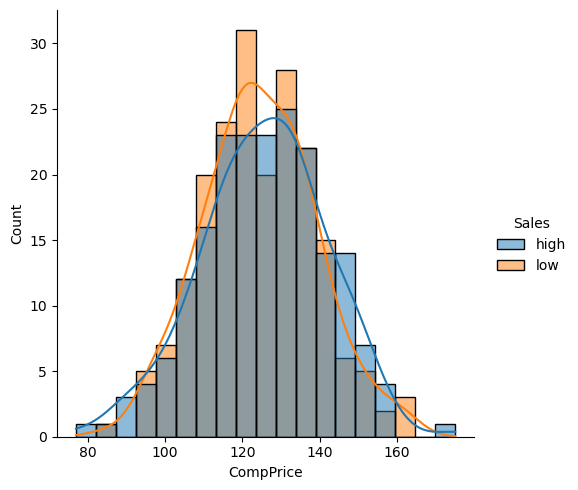

In [16]:
sns.displot(x=data.CompPrice,hue=data.Sales,data=data,kde=True)

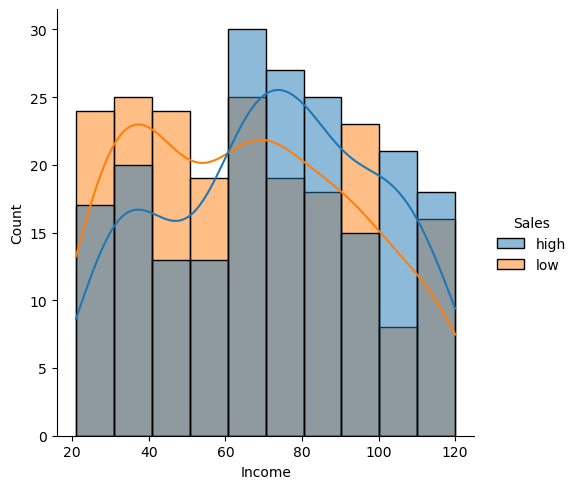

In [17]:
sns.displot(x=data.Income,hue=data.Sales,data=data,kde=True)

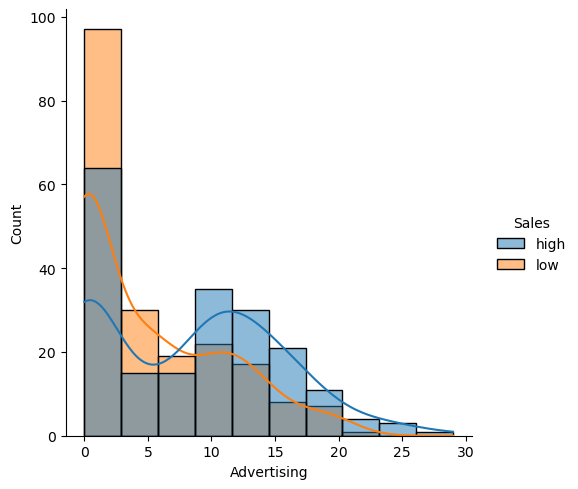

In [18]:
sns.displot(x=data.Advertising,hue=data.Sales,data=data,kde=True)

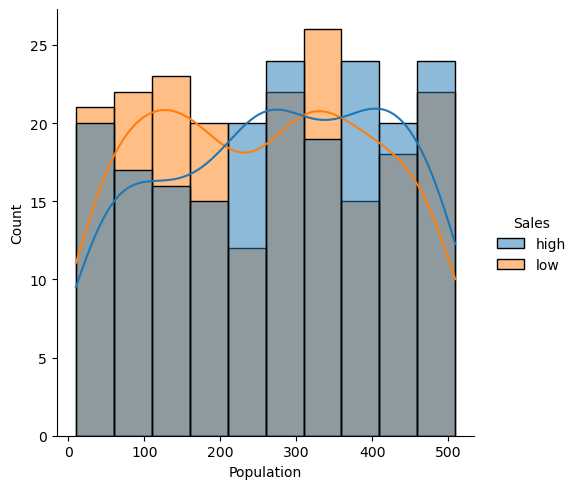

In [19]:
sns.displot(x=data.Population,hue=data.Sales,data=data,kde=True)

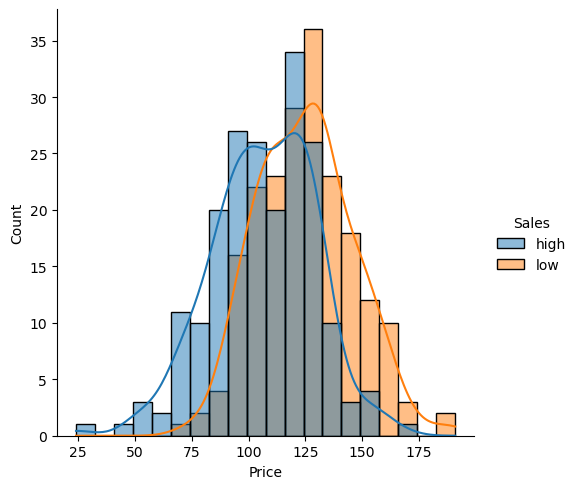

In [20]:
sns.displot(x=data.Price,hue=data.Sales,data=data,kde=True)

<Axes: xlabel='ShelveLoc', ylabel='count'>

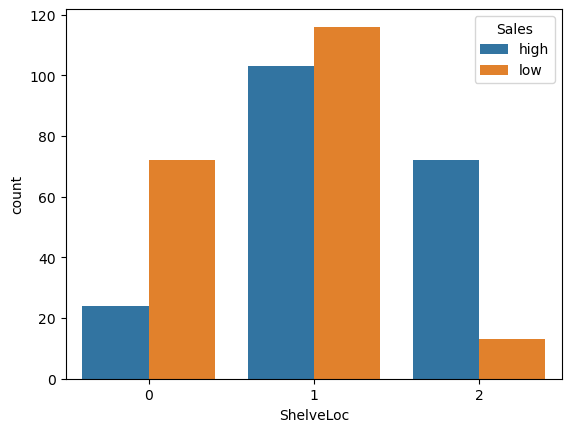

In [22]:
sns.countplot(x=data.ShelveLoc,hue=data.Sales,data=data)

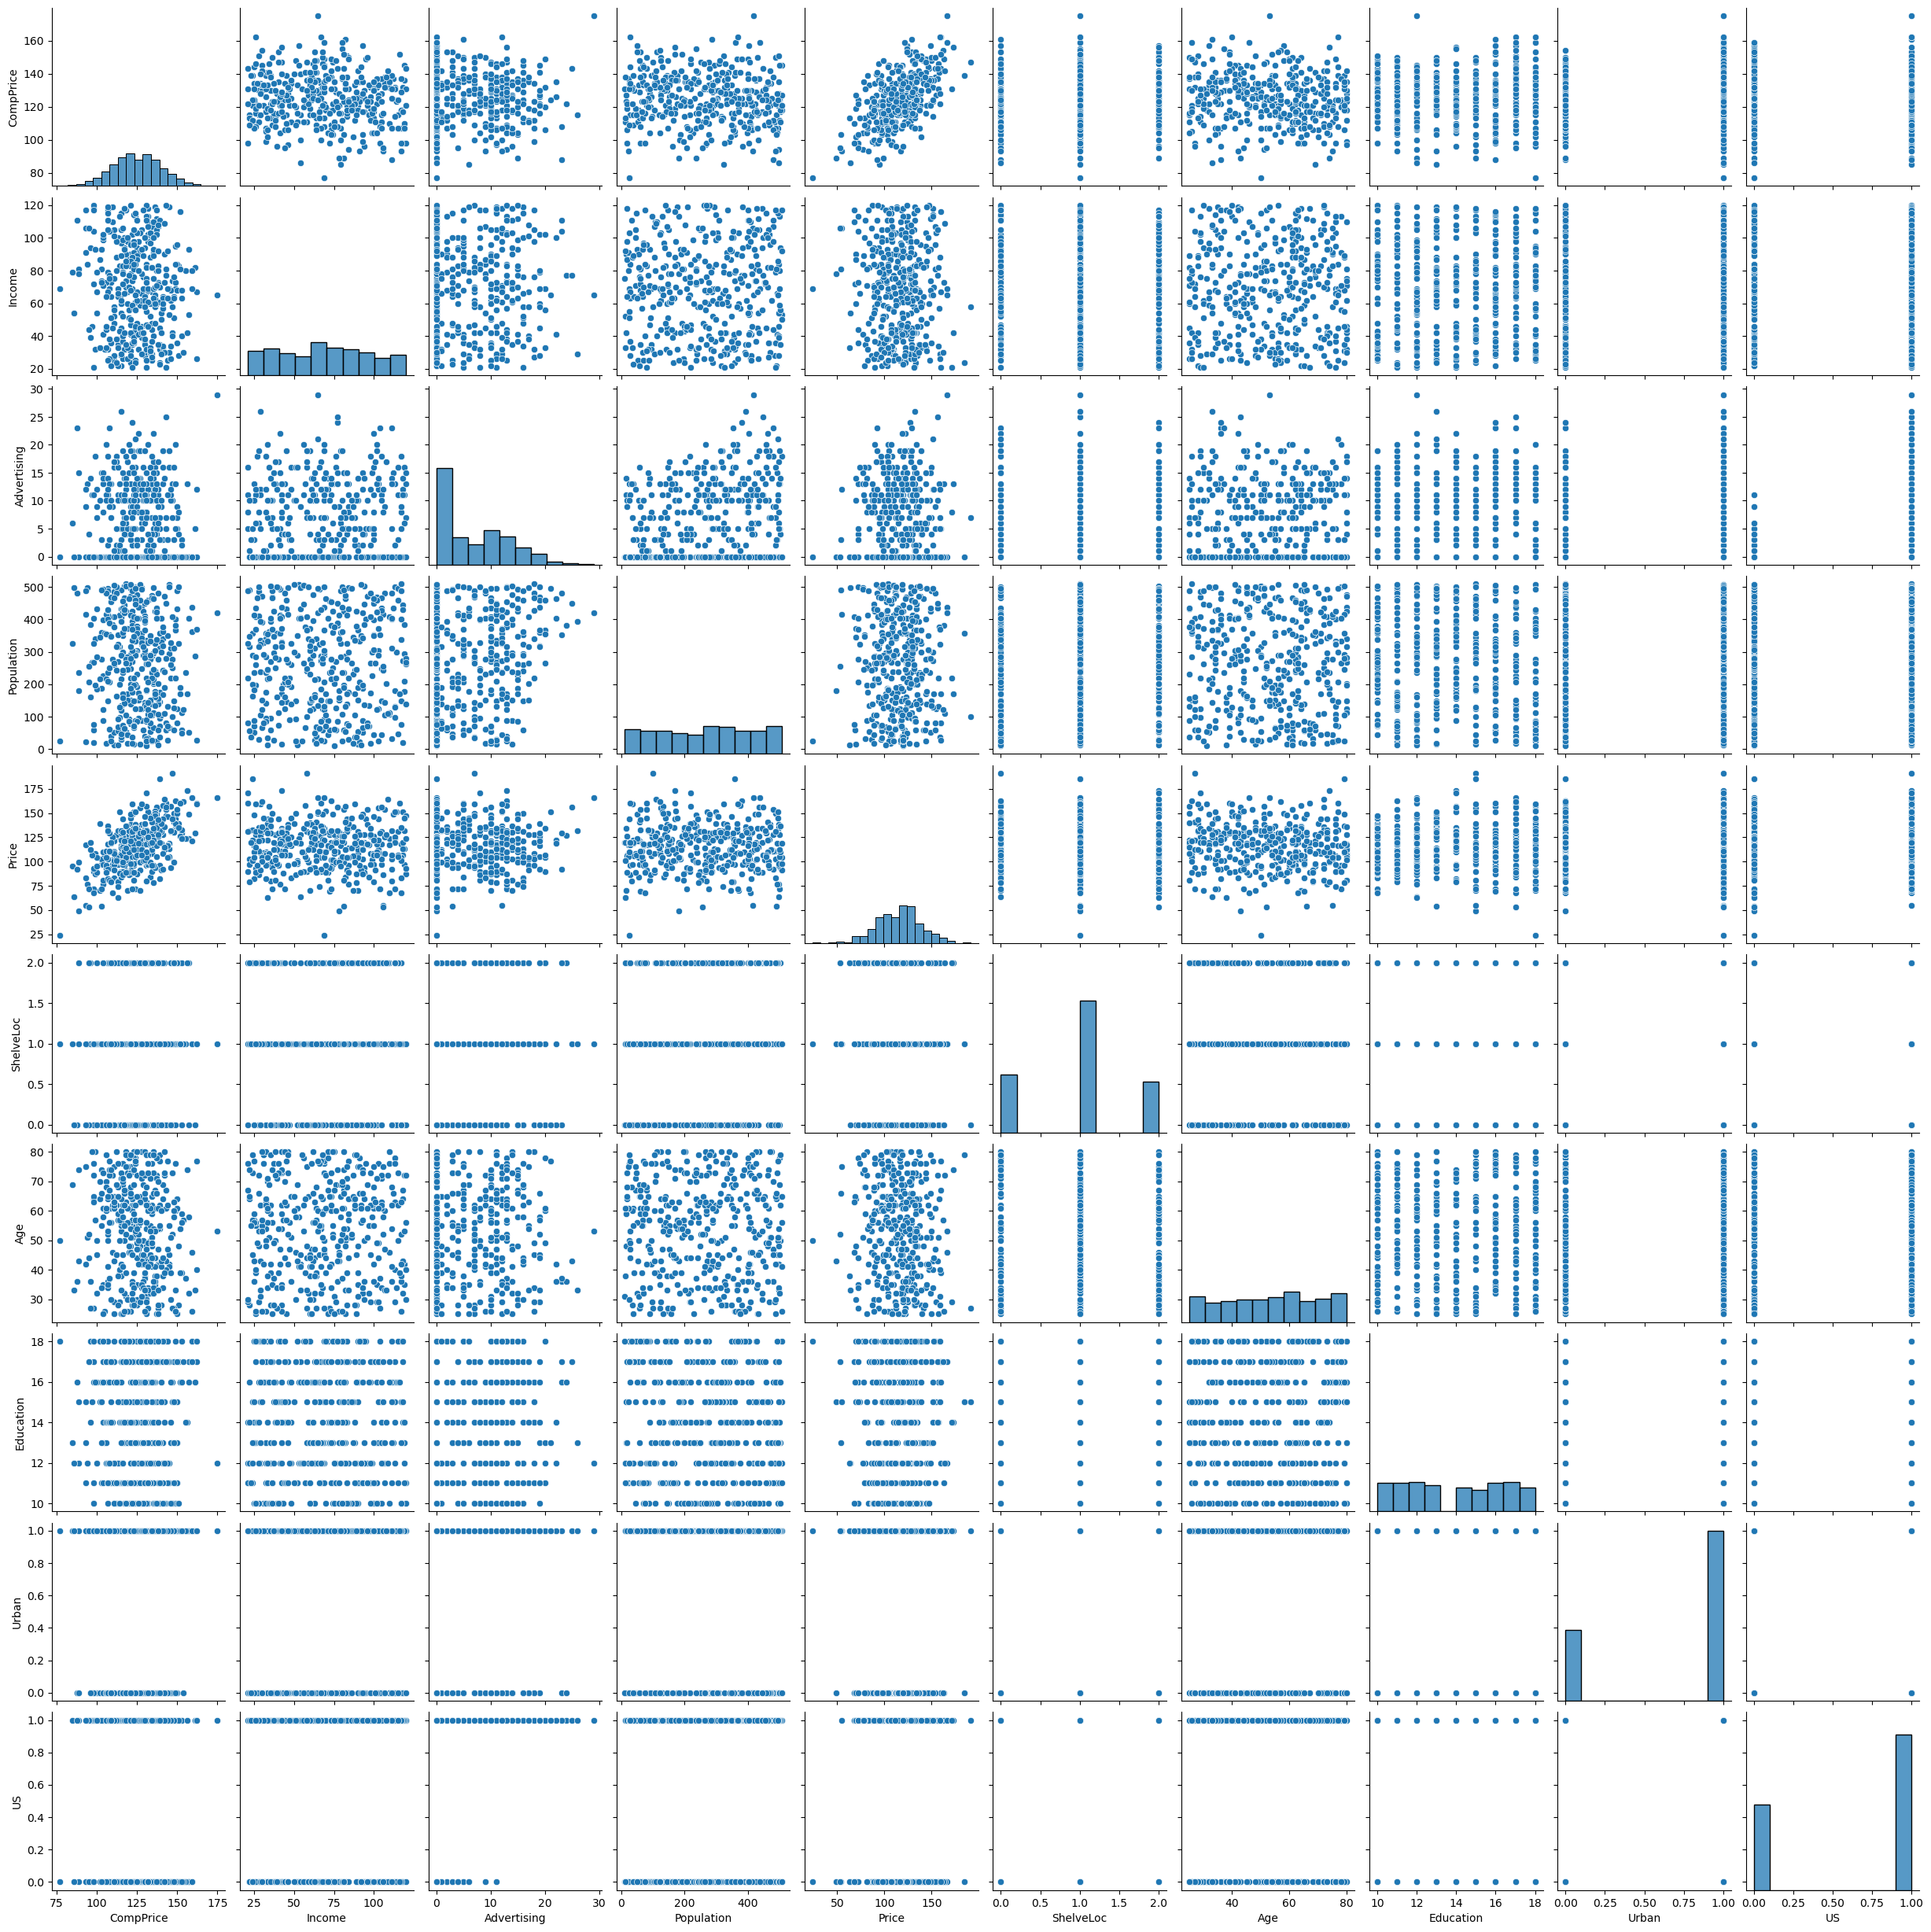

In [23]:
sns.pairplot(data)

In [24]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [25]:
x=data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
y=data.Sales

In [26]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

## Random Forest

In [47]:
rf=RandomForestClassifier(criterion='entropy')

In [48]:
model=rf.fit(x_train,y_train)

In [49]:
pred=model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
print("accuracy score for training data =",model.score(x_train,y_train))
print("accuracy score for testing data =",accuracy_score(y_test,pred))

accuracy score for training data = 1.0
accuracy score for testing data = 0.775


In [52]:
confusion_matrix(y_test,pred)

array([[31,  9],
       [ 9, 31]], dtype=int64)

In [58]:
x_test["Actual"]=y_test
x_test["Predicted"]=pred
x_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Actual,Predicted
10,121,78,9,150,100,0,26,10,0,1,high,high
280,121,86,10,496,145,0,51,10,1,1,low,low
194,112,98,18,481,128,1,45,11,1,1,low,high
193,139,70,7,71,96,2,61,10,1,1,high,high
316,122,36,5,369,72,2,35,10,1,1,high,high


## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt=DecisionTreeClassifier(criterion='entropy')

In [55]:
model2=dt.fit(x_train,y_train)

In [56]:
pred2=model2.predict(x_test)

In [57]:
print("accuracy score for training data =",model2.score(x_train,y_train))
print("accuracy score for testing data =",accuracy_score(y_test,pred2))

accuracy score for training data = 1.0
accuracy score for testing data = 0.65
